<div style="border-bottom: 2px solid #aaaaaa; border-right: 2px solid #aaaaaa; box-shadow: 5px 5px 3px #eeeeee;">
<h1>03 &#9658; Perception</h1>
</div>

## The Human Visual System and Perception

We've looked at how quantitative and categorical data can be mapped to various primitives and channels for understanding. As noted, some of those channels are better than others. The visualization display and our viewing of it is yet another mapping stage, where the representation is mapped through perception to become understanding.

### Colour Perception

Prevalent throughout visualization, colour is frequently used to represent data. This notebook will take a look at some of the perception issues that arise from our ability to see hue, saturation and intensity through the medium of colour.

In [43]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from ipywidgets import *
from IPython.display import display
from IPython.display import IFrame

### Mapping quantitative data to a colour map

Using some generated 2D image data array which creates a single variable (z), approximately in the range [-10,10], we can map data values in that range to a range of colours. A very common colourmap found in many visualization systems is the "Rainbow" or "Jet" colourmap.

In [14]:
x = np.linspace(0, 6)
y = np.linspace(0, 3)[:, np.newaxis]
z = 10 * np.cos(x ** 2) * np.exp(-y)

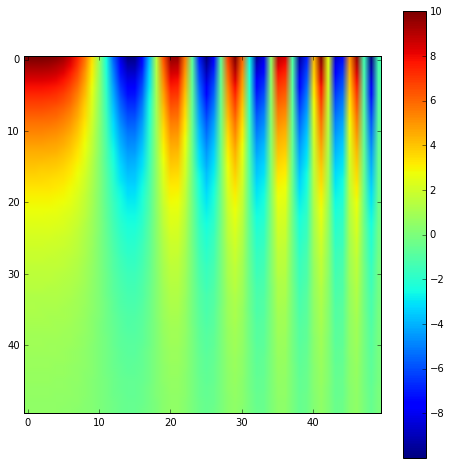

In [10]:
fig,ax = plt.subplots(1,figsize=(8,8))
ax_im = ax.imshow(z, cmap='jet')
plt.colorbar(ax_im);

At first glance it might seem reasonable: -10 maps to blue, +10 maps to dark red, with green for zero at the mid-point. We can use the colourmap legend to look-up values/colours.

The purpose of the colour mapping is to quickly show us where interesting numbers lie in the data - a process which is much quicker than browsing the data table, especially when it consists of 50x50 elements (still relatively small).

However, the jet/rainbow colourmap introduces some artifacts that might make parts of the data look more interesting than they actually are. Such as:

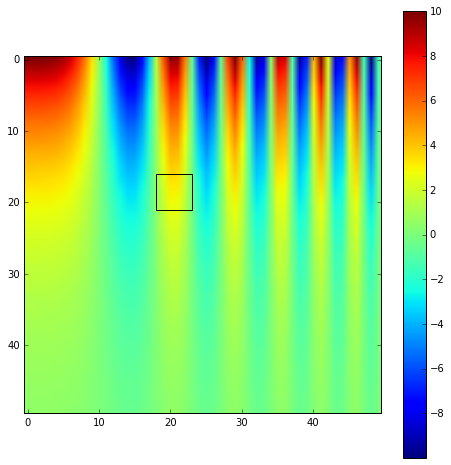

In [15]:
fig,ax = plt.subplots(1,figsize=(8,8))
ax_im = ax.imshow(z, cmap='jet')
plt.colorbar(ax_im)
roi_rect = patches.Rectangle((18,16),5,5,linewidth=1,edgecolor='k',facecolor='none')
ax.add_patch(roi_rect);

The "yellow" is bright and sharp and indicates this and other regions of interest might be some "feature" we're looking for.

**Is this correct?**

The luminance profile of this colourmap is not even.

The human eye has varying sensitivity to light depending on its colour. The luminance that we see comes from the RGB values comprising each colour in the scale but it's not simply the sum or simple average of the RGB values. The `grayify_cmap` function below uses a weighted Euclidean sum of the individual values to calculate how we see the luminance.

In [16]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

Using the grayified version of the jet cmap we can see the luminance more clearly. Similarly the peaks are now quite visible in the colourbar legend.

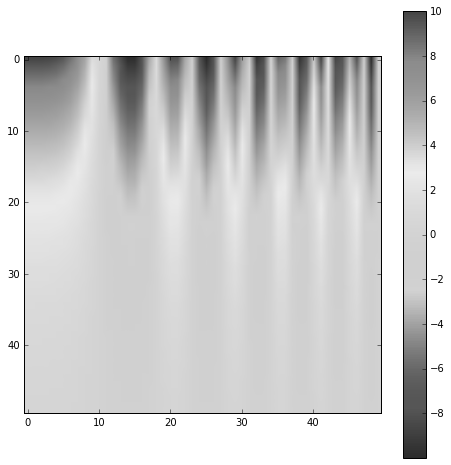

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(z, cmap=grayify_cmap('jet'))
plt.colorbar();

Now we show the two versions of the colourmap next to each other. You can see peaks in intensity in both the colour and grayified versions. **Note:** `cmap` objects typically consist of 256 lookup values as shown in the x-axis labelling.

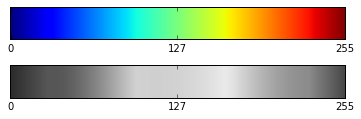

In [18]:
def show_colormap(cmap):
    im = np.outer(np.ones(25), np.arange(256))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].set_xlim([0,255])
    ax[0].set_xticks([0,127,255])
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    ax[1].set_xlim([0,255])
    ax[1].set_xticks([0,127,255])
    return fig, ax
    
show_colormap('jet');

These two functions allow us to look at the intensity profiles of the grayified cmap and alongside the individual RGB intensities for reference.

In [19]:
def plot_cmap_intensity(cmap):
    gmap = grayify_cmap(cmap)
    g_intensity = [gmap(i)[0] for i in range(gmap.N)]
    g_fig,g_ax = plt.subplots(1, figsize=(6,4))
    g_ax.plot(g_intensity, color='k')
    g_ax.yaxis.tick_right() # these two lines ensure show_colormap and this plot line up
    g_ax.yaxis.set_label_position("right")
    g_ax.set_ylabel('Intensity')
    g_ax.set_xlabel('Lookup')
    g_ax.set_xlim([0,255])
    g_ax.set_ylim([0,1])
    g_ax.set_xticks([0,127,255])
    return g_fig, g_ax

In [20]:
def plot_cmap_rgb_intensity(cmap_name):
    cmap = plt.cm.get_cmap(cmap_name)
    red = [cmap(i)[0] for i in range(cmap.N)]
    green = [cmap(i)[1] for i in range(cmap.N)]
    blue = [cmap(i)[2] for i in range(cmap.N)]
    gmap = grayify_cmap(cmap_name)
    g_intensity = [gmap(i)[0] for i in range(gmap.N)]
    g_fig,g_ax = plt.subplots(1, figsize=(6,4))
    g_ax.plot(red, color='red')
    g_ax.plot(green, color='green')
    g_ax.plot(blue, color='blue')
    g_ax.plot(g_intensity, color='k')
    g_ax.yaxis.tick_right() # these two lines ensure show_colormap and this plot line up
    g_ax.yaxis.set_label_position("right")
    g_ax.set_ylabel('Intensity')
    g_ax.set_xlabel('Lookup')
    g_ax.set_xlim([0,255])
    g_ax.set_ylim([-0.05,1.05])
    g_ax.set_xticks([0,127,255])
    return g_fig, g_ax

Let's look at both the original "jet" and grayified colourmaps with the intensity profile plot

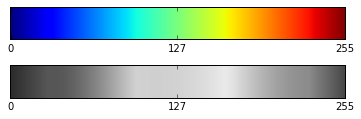

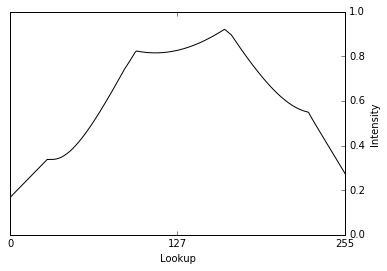

In [22]:
show_colormap('jet')
plot_cmap_intensity('jet');

This shows there are TWO significant peaks in intensity which might mislead reading of the data. Clearly some values of data map to the same intensity (though not the same hue and saturation).

Drilling down we can see the individual RGB profiles.

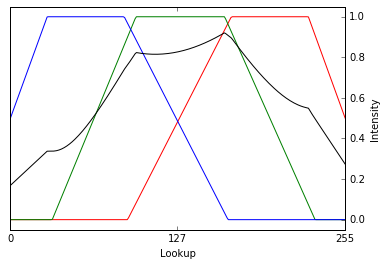

In [23]:
plot_cmap_rgb_intensity('jet');

### Better choice of colourmaps

This time we use the "gray" colourmap. This is a nice clean luminance profile and all those "features" from earlier have vanished.

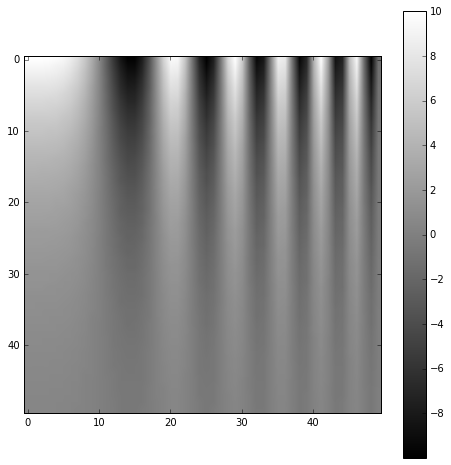

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(z, cmap=grayify_cmap('gray'))
plt.colorbar();

As this is a already a linear greyscale, the `cmap_grayify` function has no effect, and the intensity profile is as expected.

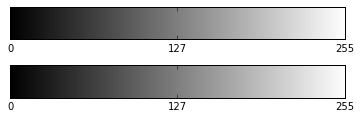

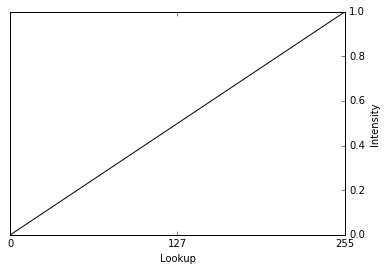

In [25]:
show_colormap('gray')
plot_cmap_intensity('gray');

Now for another colourmap: this time it's the **Cubehelix** one which provides a somewhat muted but improved jet/rainbow cmap has it has a better luminance profile.

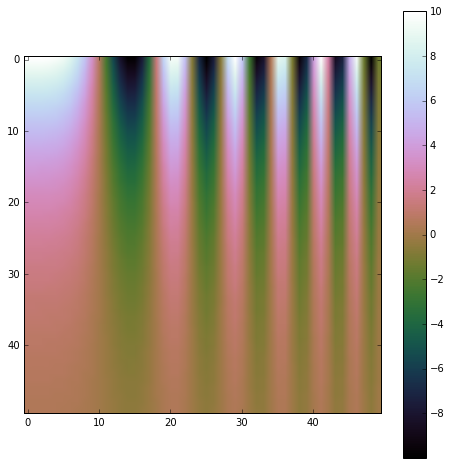

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(z, cmap='cubehelix')
plt.colorbar();

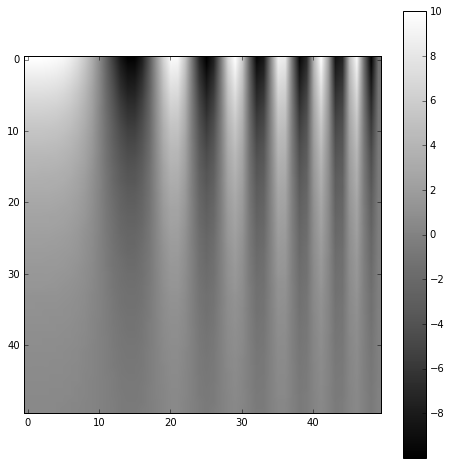

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(z, cmap=grayify_cmap('cubehelix'))
plt.colorbar();

Comparison and profile this time shows that it's not perfectly linear but at least there are no multiple peaks.

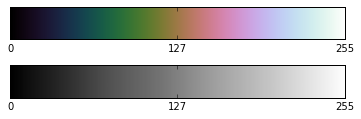

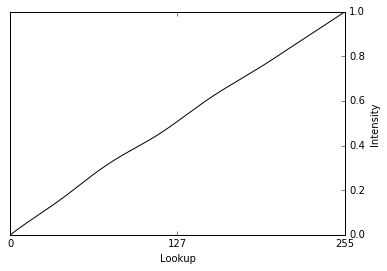

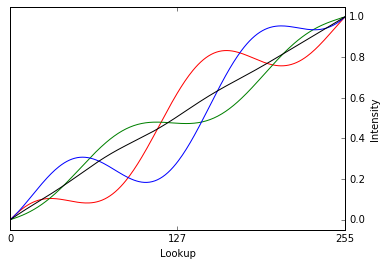

In [29]:
show_colormap('cubehelix')
plot_cmap_intensity('cubehelix')
plot_cmap_rgb_intensity('cubehelix');

### Exercise

Take a look at some of the other available colourmaps. This code lists them (but excludes those ending with "\_r" which simply indicates the cmap is in reverse order. 

In [30]:
# [m for m in plt.cm.datad]
print([m for m in plt.cm.datad if not m.endswith("_r")])

['BrBG', 'copper', 'Spectral', 'PuBu', 'winter', 'gist_gray', 'Pastel2', 'OrRd', 'PRGn', 'Greens', 'gist_earth', 'BuGn', 'gray', 'cubehelix', 'gist_stern', 'PuRd', 'PiYG', 'seismic', 'YlGnBu', 'gist_yarg', 'afmhot', 'gnuplot2', 'Purples', 'nipy_spectral', 'RdGy', 'spring', 'YlGn', 'Dark2', 'terrain', 'GnBu', 'BuPu', 'hot', 'CMRmap', 'Pastel1', 'Accent', 'Set3', 'gnuplot', 'RdYlBu', 'PuOr', 'Set2', 'RdPu', 'bwr', 'ocean', 'brg', 'jet', 'hsv', 'Paired', 'summer', 'RdBu', 'prism', 'bone', 'flag', 'binary', 'cool', 'Wistia', 'PuBuGn', 'gist_rainbow', 'Set1', 'gist_heat', 'YlOrRd', 'Blues', 'pink', 'YlOrBr', 'RdYlGn', 'spectral', 'Greys', 'gist_ncar', 'Oranges', 'rainbow', 'autumn', 'coolwarm', 'Reds']


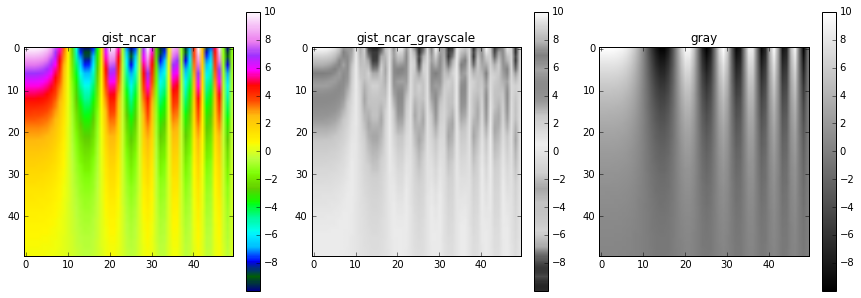

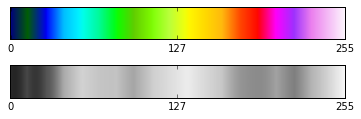

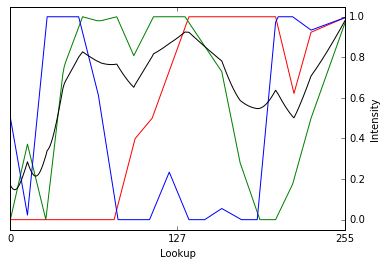

In [31]:
sel_cmap = 'gist_ncar'

cmaps = [plt.cm.get_cmap(sel_cmap), grayify_cmap(sel_cmap), plt.cm.gray]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.1)

for cmap, ax in zip(cmaps, axes):
    im = ax.imshow(z, cmap=cmap)
    ax.set_title(cmap.name)
    fig.colorbar(im, ax=ax)

show_colormap(sel_cmap)
plot_cmap_rgb_intensity(sel_cmap);

## Pitfalls of Perception

Unfortunately getting the colour and intensity mapping "correct", is not quite enough when it comes to human perception. While very powerful, our visual cortex has a number of tricks up its sleeves to help us understand the world around us.

### Contrast Illusion

> add a few bars here

### Kofka Ring Illusion

In the first image, the grey ring appears to be a uniform shade of grey, even when placed on a contrasting background

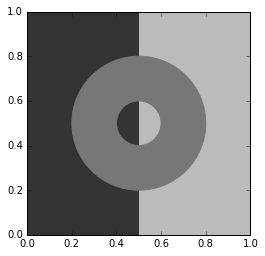

In [36]:
kofka_fig = plt.figure()
kofka_ax = kofka_fig.add_subplot(111, aspect='equal')
kofka_ax.add_patch(patches.Rectangle((0.0, 0.0), 0.5, 1, linewidth=1, edgecolor='#333333',facecolor='#333333'))
kofka_ax.add_patch(patches.Rectangle((0.5, 0.0), 0.5, 1, linewidth=1, edgecolor='#bbbbbb',facecolor='#bbbbbb'))
kofka_ax.add_patch(patches.Wedge((0.5,0.5), 0.3, 0, 360, width=0.2, linewidth=1, edgecolor='#777777',facecolor='#777777'));

In the second image, the two halves have been separated. The two halves of the grey ring now appear to be different shades.

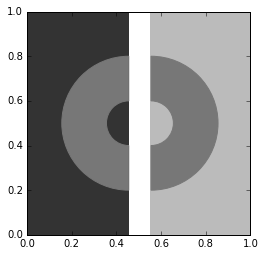

In [35]:
kofka_fig2 = plt.figure()
kofka_ax2 = kofka_fig2.add_subplot(111, aspect='equal')
kofka_ax2.add_patch(patches.Rectangle((-0.05, 0.0), 0.5, 1, linewidth=1, edgecolor='#333333',facecolor='#333333'))
kofka_ax2.add_patch(patches.Rectangle((0.55, 0.0), 0.5, 1, linewidth=1, edgecolor='#bbbbbb',facecolor='#bbbbbb'))
# adjustment of 0.005 to positioning of wedges to 'fix it'
kofka_ax2.add_patch(patches.Wedge((0.555,0.5), 0.3, -90, 90, width=0.2, linewidth=1, edgecolor='#777777',facecolor='#777777'))
kofka_ax2.add_patch(patches.Wedge((0.455,0.5), 0.3, 90, -90, width=0.2, linewidth=1, edgecolor='#777777',facecolor='#777777'));

In the final image, the two halves have been slid vertically. This creates an illusion of transparency.

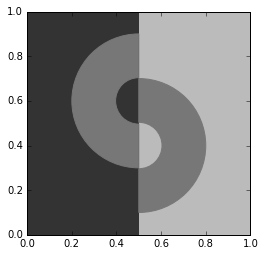

In [37]:
kofka_fig3 = plt.figure()
kofka_ax3 = kofka_fig3.add_subplot(111, aspect='equal')
kofka_ax3.add_patch(patches.Rectangle((0.0, 0.0), 0.5, 1, linewidth=1, edgecolor='#333333',facecolor='#333333'))
kofka_ax3.add_patch(patches.Rectangle((0.5, 0.0), 0.5, 1, linewidth=1, edgecolor='#bbbbbb',facecolor='#bbbbbb'))
kofka_ax3.add_patch(patches.Wedge((0.5,0.4), 0.3, -90, 90, width=0.196, linewidth=1, edgecolor='#777777',facecolor='#777777'))
kofka_ax3.add_patch(patches.Wedge((0.5,0.6), 0.3, 90, -90, width=0.196, linewidth=1, edgecolor='#777777',facecolor='#777777'));

### Exercise

Try modifying the thickness of the rings above (the width parameter of the wedge patches) to see if that has any effect, as noted in the second reference below.

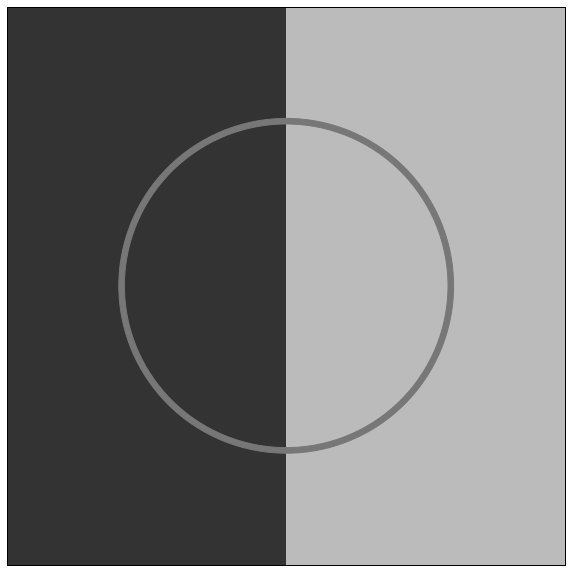

In [39]:
kofka_fig4, kofka_ax4 = plt.subplots(1, figsize=(10, 10),subplot_kw=dict(xticks=[],yticks=[]))
plt.close(kofka_fig4) # stop rendering it twice!

r1 = kofka_ax4.add_patch(patches.Rectangle((0.0, 0.0), 0.5, 1, linewidth=1, edgecolor='#333333',facecolor='#333333'))
r2 = kofka_ax4.add_patch(patches.Rectangle((0.5, 0.0), 0.5, 1, linewidth=1, edgecolor='#bbbbbb',facecolor='#bbbbbb'))
wedge4 = kofka_ax4.add_patch(patches.Wedge((0.5,0.5), 0.3, 0, 360, width=0.2, linewidth=1, edgecolor='#777777',facecolor='#777777'))

def upd(r_width=0.01):
    wedge4.set_width(r_width)
    display(kofka_fig4)
    return None

_ = interact(upd, r_width=(0.0,0.3,0.01))

What you might "see" is that when the ring is very thin, the contrast illusion returns, and the two halves appear to be of a different intensity. However once perceived that way, you can move the slider, increase the width and **still** see differing intensity, which will last until you look away and back again.

### Sharp and Fuzzy

> Fuzzy disc image and descr

### Shadow Play

Our world is 3D. This is a well known illusion but particularly effective.

Take a look at the chessboard image below. There are two squares marked A and B. **Which one is the darkest?**

![Checkerboard](images/chess1.jpg)

To most people this seems like an "obvious" choice - "A" is darker, after all it's one of the darker checks on the board.

As you have probably anticipated, this is not the case:

![Checkboard with connecting strips](images/chess2.jpg)

<a href="http://web.mit.edu/persci/people/adelson/checkershadow_illusion.html">[MIT]</a>

With the connecting strips in place, the illusion is broken and it can be seen that the two squares are actually the same shade of grey/intensity. If not convinced try the eye-dropper tool in Photoshop!

The visual system is trying to determine where the shadows are, to make sense of the 3D scene. Local contrast enhancement sees "light" squares as "being lighter" and "dark" squares as "being darker", so the shadow effects are operating against these classifications.

As seen with the blurry disc images above, the visual system is not as well attuned to soft edges. The checkerboard image contains sharp-edges on for the squares but soft-edges for the shadows, so the latter aren't perceived as well. 

See the <a href="https://en.wikipedia.org/wiki/Checker_shadow_illusion">[Wikipedia]</a> entry for additional versions showing a heavily cropped image, and another with a floating polygon that creates a flip-flop effect".

### Colour and Edges

Let's bring some colour back into the scene. How might these perceptual issues affect our ability to decode colours?

The following embedded d3.js web page, lays out a grid of randomised colours, such as what we might get from mapping colours to some random data.

It appears as a nice "patchwork" of colours. However, press the *Sort by colour* link and watch as the individual patches move around to be ordered by hue and intensity. Notice anything? 

In [44]:
IFrame(('../rse-workshop/colour-mixing-illusion/index.html'), width=640, height=640)

When arranged by colour, the visual system kicks in and starts to see the whole grid as being "illuminated". It actually makes it look like a different set of colours.

The more subtle edges are enhanced through the phenomena known as "Mach Banding" which exaggerates the contrast.

<a href="https://en.wikipedia.org/wiki/Mach_bands">[Wikipedia]</a>

The effect can be broken by using the *Scale using shrink* option. With the white gaps in-between, the soft-edges have gone and the contrast is no longer enhanced.

## It's incredibly important

![War](images/rabbit_duck.jpg)

## Further Reading

> Thanks to Jake Vanderplas and this blog post for providing the grayify code and the basis for this notebook: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

> IEEE Computer Graphics and Applications paper on why the Rainbow Color Map **Still** Considered Harmful: https://github.com/djoshea/matlab-utils/blob/master/libs/perceptuallyImprovedColormaps/Rainbow%20Color%20Map%20-Still-%20Considered%20Harmful.pdf

> More information about the **Cubehelix** colourmap: https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/

> [1] http://www.cns.nyu.edu/~david/courses/perception/lecturenotes/brightness-contrast/brightness-contrast.html

> [2] http://precedings.nature.com/documents/1433/version/1